In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Model Summary

In [40]:
## Load all csv
models = ['dt', 'rf', 'xgb', 'nb']
res = pd.DataFrame({"model":[]})
for model in models:
    df = pd.read_csv("res_%s.csv" % model)
    df['model'] = model
    res = pd.concat([res, df], axis=0)

In [41]:
res = res.drop("0", axis=1)

In [42]:
pd.options.display.float_format = '{:,.3f}'.format

In [43]:
res.iloc[:,:-1]

,model,auc,accuracy,balanced_accuracy,precision,recall,f1_score
0,dt,0.944,0.920,0.871,0.895,0.773,0.829
0,rf,0.953,0.909,0.879,0.818,0.818,0.818
0,xgb,0.953,0.898,0.871,0.783,0.818,0.800
0,nb,0.954,0.875,0.871,0.704,0.864,0.776


In [44]:
print(res.iloc[:,:-1].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
model &   auc &  accuracy &  balanced\_accuracy &  precision &  recall &  f1\_score \\
\midrule
   dt & 0.944 &     0.920 &              0.871 &      0.895 &   0.773 &     0.829 \\
   rf & 0.953 &     0.909 &              0.879 &      0.818 &   0.818 &     0.818 \\
  xgb & 0.953 &     0.898 &              0.871 &      0.783 &   0.818 &     0.800 \\
   nb & 0.954 &     0.875 &              0.871 &      0.704 &   0.864 &     0.776 \\
\bottomrule
\end{tabular}



In [45]:
pd.concat([res['model'], res.iloc[:,-1:]], axis=1)

,model,"confusion_matrix (tp,tn,fp,fn)"
0,dt,"[17, 64, 2, 5]"
0,rf,"[18, 62, 4, 4]"
0,xgb,"[18, 61, 5, 4]"
0,nb,"[19, 58, 8, 3]"


In [46]:
print(pd.concat([res['model'], res.iloc[:,-1:]], axis=1).to_latex(index=False))

\begin{tabular}{ll}
\toprule
model & confusion\_matrix (tp,tn,fp,fn) \\
\midrule
   dt &                 [17, 64, 2, 5] \\
   rf &                 [18, 62, 4, 4] \\
  xgb &                 [18, 61, 5, 4] \\
   nb &                 [19, 58, 8, 3] \\
\bottomrule
\end{tabular}



### Generalization Performance

In [1]:
auc_outer_score = [0.9058618, 0.9166982, 0.912393, 0.9303134]
models = ['dt', 'rf', 'xgb', 'nb']

In [8]:
df_gen_performance = pd.DataFrame([models, auc_outer_score]).T.rename(columns={0:'models', 1:'avg_outer_score'})

In [20]:
sns.set_style('whitegrid')

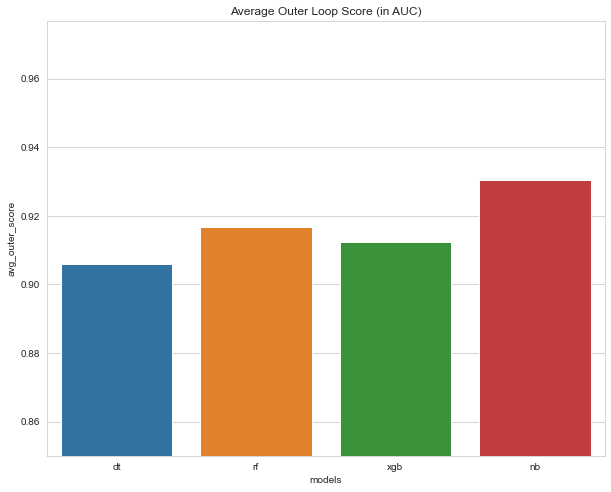

In [37]:
plt.figure(figsize=(10,8))
plt.title("Average Outer Loop Score (in AUC)")
sns.barplot(x='models', y='avg_outer_score', data=df_gen_performance)
plt.ylim(0.85)
plt.show()

### Time Performance

In [47]:
df = pd.concat([pd.read_csv("tes_n.csv"), pd.read_csv("tes_n2.csv"), pd.read_csv("tes_n3.csv")], axis=0)

In [48]:
## Find Time Taken Average
df.iloc[:,1:]

,merchant_name,broken_link_score,link_contact_us_exist,cu_email_exist,cu_phone_number_exist,link_about_us_exist,link_tnc_exist,tnc_refund_policy_exist,contact_us_score,tnc_score,links_response,website,prediction_class,prediction_prob,time_taken
0,Enomin.com,0.000,1.000,0.000,1.000,1.000,1.000,1.000,66.667,100.000,{'https://1.bp.blogspot.com/-nmP3X7WFP4Y/XmD13...,https://www.enomin.com,0.000,0.000,12.161
1,PTAsuransiJiwaManulifeIndonesia,0.000,1.000,1.000,1.000,1.000,1.000,1.000,100.000,100.000,{'https://www.manulife.co.id/id/layanan/kelola...,https://www.manulife.co.id,0.000,0.000,17.885
2,DigitalServiceTestingMerchant,0.000,1.000,1.000,1.000,1.000,1.000,1.000,100.000,100.000,{'https://www.doku.com/customer-support': '<Re...,www.doku.com,0.000,0.000,9.589
3,WhiskerWoof,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,No hyperlinks gathered,WhiskerWoof.com,1.000,0.998,1.074
4,AndrologiIndonesia,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,No hyperlinks gathered,https://www.andrologi.id,1.000,0.998,2.123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,SukaLes,0.000,1.000,1.000,1.000,1.000,1.000,0.000,100.000,50.000,"{'': 'No Response/Timeout', 'https://www.sukal...",https://www.sukales.com/,0.000,0.000,17.866
51,Wrsell,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,No hyperlinks gathered,wrsell.com,1.000,0.998,0.855
52,WhereisWayan?,1.000,1.000,1.000,1.000,0.000,0.000,1.000,100.000,50.000,No hyperlinks gathered,https://www.whereiswayan.com,0.000,0.017,15.877
53,Megadapur,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,No hyperlinks gathered,https://megadapur.com,1.000,0.998,6.000


In [65]:
df['time_taken'].describe().to_string()

'count   100.000\nmean     14.375\nstd      22.086\nmin       0.313\n25%       1.575\n50%       8.288\n75%      18.564\nmax     186.286'

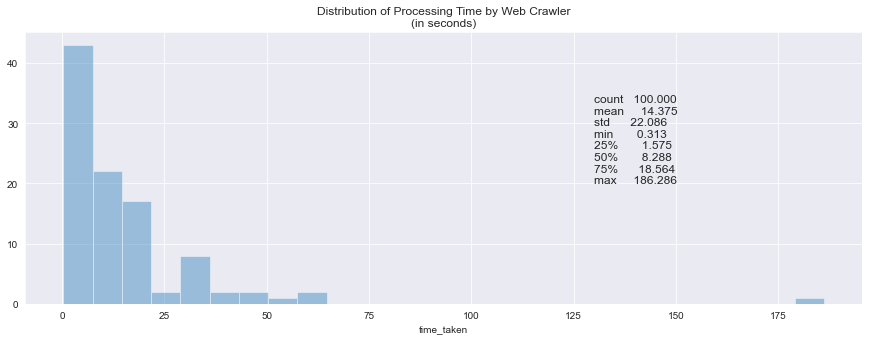

In [75]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.distplot(df['time_taken'], kde=False)
plt.text(x=130, y=20, s=df['time_taken'].describe().to_string(), fontsize=12)
plt.title("Distribution of Processing Time by Web Crawler\n(in seconds)")
plt.show()

### Sample Merchant Data

In [28]:
merchants = pd.read_csv("merchants_cleaned.csv")

In [29]:
merchants.drop_duplicates("website").sample(n=100, replace=False).iloc[:,1:].reset_index(drop=True).to_csv("merchants_sampled.csv", index=False)

In [30]:
merchants_sampled = pd.read_csv("merchants_sampled.csv")
merchants_sampled

,merchant_name,website,label
0,Enomin.com,https://www.enomin.com,APPROVED
1,PTAsuransiJiwaManulifeIndonesia,https://www.manulife.co.id,APPROVED
2,DigitalServiceTestingMerchant,www.doku.com,APPROVED
3,WhiskerWoof,WhiskerWoof.com,REJECTED
4,AndrologiIndonesia,https://www.andrologi.id,APPROVED
...,...,...,...
95,buy-saber,https://buy-saber.com/,APPROVED
96,SukaLes,https://www.sukales.com/,APPROVED
97,Wrsell,wrsell.com,REJECTED
98,WhereisWayan?,https://www.whereiswayan.com,APPROVED
